# Introduction / Business Problem

Buddakan is a restaurant chain serving New American Asian cuisine owned by STARR Restaurants with locations in Philadelphia, Pennsylvania, New York City, New York and Atlantic City, New Jersey. Buddakan presents the vivid flavors of the Far East in a surreal atmosphere that marries the serenity of Asia with the flamboyance of 16th-century Paris.

Buddakan is planning to open a restaurant in the heart of United Kingdom, London, to broaden their asian fusion food venture into the United Kingdom.

A Geospatial data analysis of the city of London is performed to determine the best location to open the restaurant. Since Buddakan is an Asian Fusion style restaurant, The target audience is mostly Asian and White. Each Borough is segmented, clustered and analyzed for determining the best neighborhood(s) with most target audience to open the restaurant. Foursquare API is used to determine the coordinates of the location of these boroughs in London.

# Data

The best Neighborhood(s) with most target audience is determined by using the data provided by London Datastore. The Dataset consists of all 33 boroughs in London along with the respective population for each Borough. The Coordinates(Latitude and Longitude) of each borough is scraped from the Wikipedia page: "https://en.wikipedia.org/wiki/List_of_London_boroughs"

The Population is further classified based on ethnicity: White, Asian and Black for each borough to determine the best one with most target audience. The Data set also contains the nationality of the population in terms of continent for each borough.

A Geospatial data analysis of London is set to be performed to determine the best location using Foursquare API. Foursquare API is used to locate, segment and cluster these boroughs using their coordinates(Latitude and Longitude).

# Data Analysis of London Boroughs

In [551]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib notebook

### Create a DataFrame for Analysis of Boroughs

In [90]:
df_lon = pd.read_excel(r'London_Population_by_Borough.xlsx')
df_lon.head()

,Borough,Population,White,Asian,Black,Mixed/ Other,British,Europeans,Asians,Americans,Rest of World
0,Barking and Dagenham,224332.972143,109000,54000,36000,15000,167000,27000,10000,2000,6000
1,Barnet,415066.094851,250000,57000,30000,54000,321000,45000,17000,3000,6000
2,Bexley,243193.377090,195000,17000,21000,15000,219000,18000,4000,1000,6000
3,Brent,348633.247526,102000,107000,62000,56000,226000,66000,27000,2000,7000
4,Bromley,328780.563072,267000,15000,21000,28000,291000,21000,8000,2000,8000


### Scrap the Wikipedia Page and Get the Co-Ordinates of Each Borough

In [74]:
df_coord = pd.read_html("https://en.wikipedia.org/wiki/List_of_London_boroughs")[0]
df_scraped = df_coord.loc[:,['Borough','Co-ordinates']]
df_scraped['Borough'] = df_scraped['Borough'].str.replace("note 1","")
df_scraped['Borough'] = df_scraped['Borough'].str.replace("note 2","")
df_scraped['Borough'] = df_scraped['Borough'].str.replace("note 4","")
df_scraped['Borough'] = df_scraped['Borough'].str.replace("[","")
df_scraped['Borough'] = df_scraped['Borough'].str.replace("]","")
df_scraped.head()

,Borough,Co-ordinates
0,Barking and Dagenham,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E
1,Barnet,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W
2,Bexley,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E
3,Brent,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W
4,Bromley,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E


### Get the Latitude and Longitude for each Borough

In [174]:
df_scraped['Latitude'] = df_scraped['Co-ordinates'].str[23:32]
df_scraped['Longitude'] = df_scraped['Co-ordinates'].str[35:41]
df_scraped.head()

,Borough,Co-ordinates,Latitude,Longitude
0,Barking and Dagenham,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,﻿51.5607,0.1557
1,Barnet,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,﻿51.6252,-0.1517
2,Bexley,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,﻿51.4549,0.1505
3,Brent,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,﻿51.5588,-0.2817
4,Bromley,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,﻿51.4039,0.0198


### Merge the scraped DataFrame and the created DataFrame

In [363]:
df_london = pd.merge(df_lon,df_scraped[['Latitude', 'Longitude']], left_index = True, right_index=True)
df_london.head()

,Borough,Population,White,Asian,Black,Mixed/ Other,British,Europeans,Asians,Americans,Rest of World,Latitude,Longitude
0,Barking and Dagenham,224332.972143,109000,54000,36000,15000,167000,27000,10000,2000,6000,﻿51.5607,0.1557
1,Barnet,415066.094851,250000,57000,30000,54000,321000,45000,17000,3000,6000,﻿51.6252,-0.1517
2,Bexley,243193.377090,195000,17000,21000,15000,219000,18000,4000,1000,6000,﻿51.4549,0.1505
3,Brent,348633.247526,102000,107000,62000,56000,226000,66000,27000,2000,7000,﻿51.5588,-0.2817
4,Bromley,328780.563072,267000,15000,21000,28000,291000,21000,8000,2000,8000,﻿51.4039,0.0198


In [221]:
df_london.head()

,Unnamed: 0,Borough,Population,White,Asian,Black,Mixed/ Other,British,Europeans,Asians,Americans,Rest of World,Latitude,Longitude
0,0,Barking and Dagenham,224332.9721,109000,54000,36000,15000,167000,27000,10000,2000,6000,51.5607,0.1557
1,1,Barnet,415066.0949,250000,57000,30000,54000,321000,45000,17000,3000,6000,51.6252,-0.1517
2,2,Bexley,243193.3771,195000,17000,21000,15000,219000,18000,4000,1000,6000,51.4549,0.1505
3,3,Brent,348633.2475,102000,107000,62000,56000,226000,66000,27000,2000,7000,51.5588,-0.2817
4,4,Bromley,328780.5631,267000,15000,21000,28000,291000,21000,8000,2000,8000,51.4039,0.0198


## Create a Map to show the Boroughs in London

In [555]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import requests
# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

#### Geographical Co-ordinates of London using Geolocator

In [223]:
address = 'London'

geolocator = Nominatim(user_agent="London")
location = geolocator.geocode(address)
latitude_london = location.latitude
longitude_london = location.longitude
print('The geograpical co-ordinates of London are {}, {}.'.format(latitude_london, longitude_london))

The geograpical co-ordinates of London are 51.5073219, -0.1276474.


In [335]:
map_london = folium.Map(location=[latitude_london, longitude_london], zoom_start=10)

# add markers to map
for lat, lng, label in zip(df_london['Latitude'], df_london['Longitude'], df_london['Borough']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_london)  
    
map_london

### Create seperate DataFrame based on Ethnicity to perform EDA

In [343]:
df_ethnic = pd.DataFrame(df_london[['Borough', 'Population','White','Asian','Black','Mixed/ Other']])
df_ethnic.head()

,Borough,Population,White,Asian,Black,Mixed/ Other
0,Barking and Dagenham,224332.9721,109000,54000,36000,15000
1,Barnet,415066.0949,250000,57000,30000,54000
2,Bexley,243193.3771,195000,17000,21000,15000
3,Brent,348633.2475,102000,107000,62000,56000
4,Bromley,328780.5631,267000,15000,21000,28000


### Create seperate DataFrame based on origin by continent to perform EDA

In [341]:
df_origin = pd.DataFrame(df_london[['Borough','British','Europeans','Asians','Americans', 'Rest of World']])
df_origin.head()

,Borough,British,Europeans,Asians,Americans,Rest of World
0,Barking and Dagenham,167000,27000,10000,2000,6000
1,Barnet,321000,45000,17000,3000,6000
2,Bexley,219000,18000,4000,1000,6000
3,Brent,226000,66000,27000,2000,7000
4,Bromley,291000,21000,8000,2000,8000


# Exploratory Data Analysis

### EDA based on Ethnicity

#### Borough vs Population

<IPython.core.display.Javascript object>


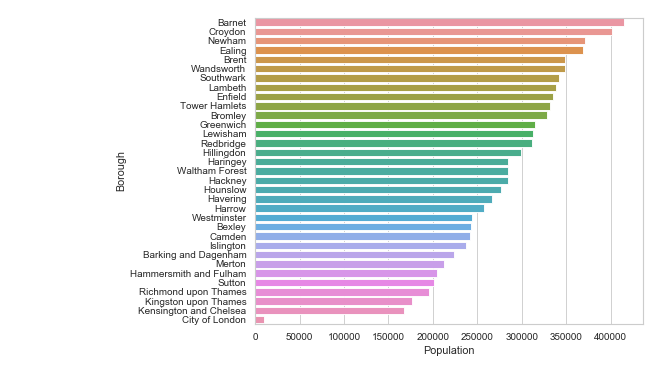

In [303]:
sns.set(style="whitegrid")
ax = sns.barplot(x="Population", y="Borough", data=df_ethnic)
plt.tight_layout()
plt.show()

#### Borough vs White

<IPython.core.display.Javascript object>


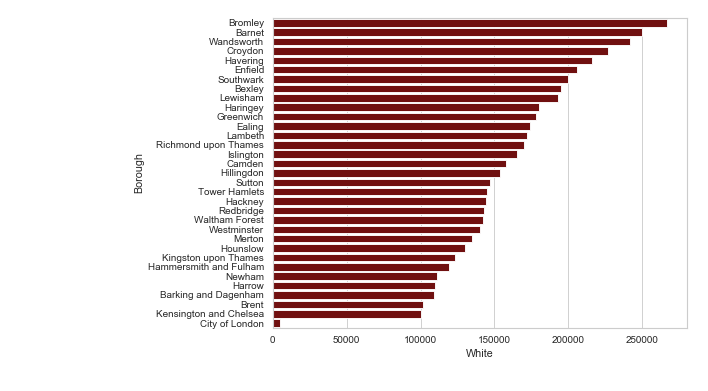

In [306]:
sns.set(style="whitegrid")
ax = sns.barplot(x="White", y="Borough", data=df_ethnic, color = "maroon")
plt.tight_layout()
plt.show()

#### Borough vs Asian

<IPython.core.display.Javascript object>


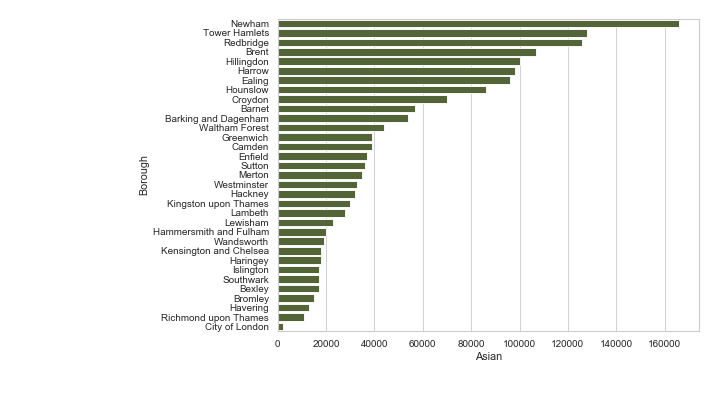

In [308]:
sns.set(style="whitegrid")
ax = sns.barplot(x="Asian", y="Borough", data=df_ethnic, color = "darkolivegreen")
plt.tight_layout()
plt.show()

#### Borough vs Mixed/ Other

<IPython.core.display.Javascript object>


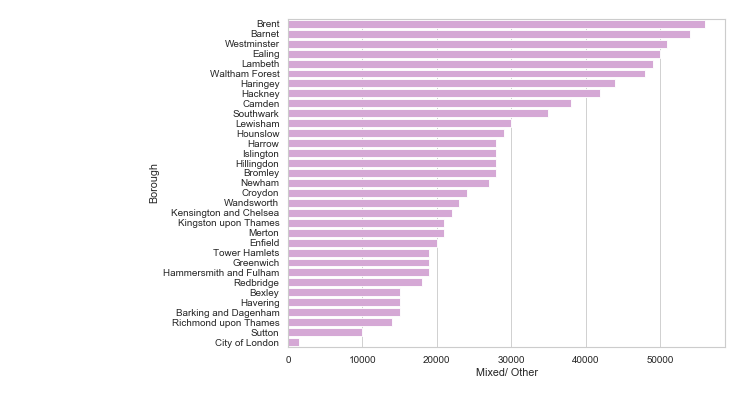

In [310]:
sns.set(style="whitegrid")
ax = sns.barplot(x="Mixed/ Other", y="Borough", data=df_ethnic, color = "plum")
plt.tight_layout()
plt.show()

### EDA based on Nationality

#### Borough vs British

<IPython.core.display.Javascript object>


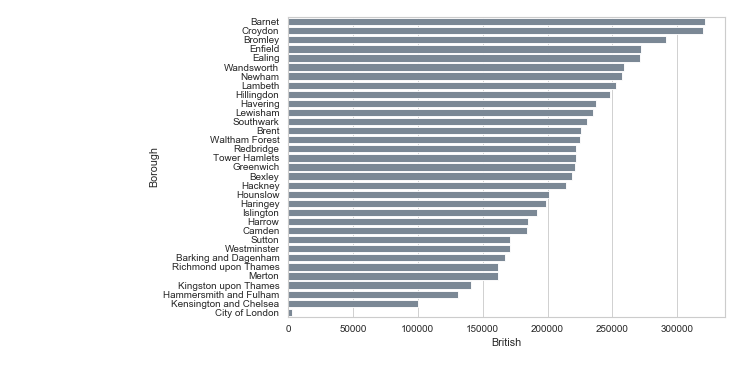

In [313]:
sns.set(style="whitegrid")
ax = sns.barplot(x="British", y="Borough", data=df_origin, color = "lightslategray")
plt.tight_layout()
plt.show()

#### Borough vs Europeans

<IPython.core.display.Javascript object>


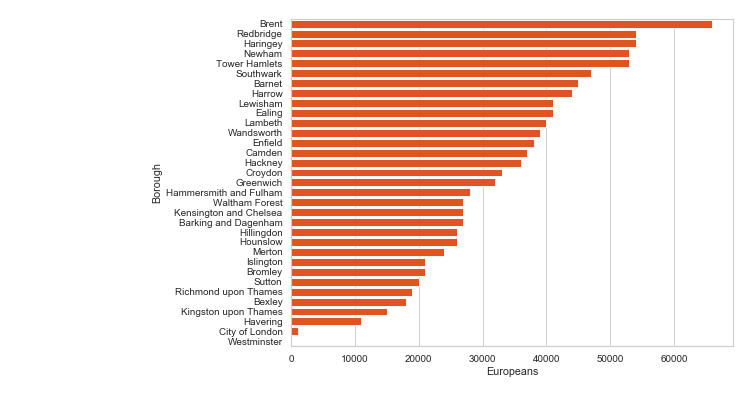

In [315]:
sns.set(style="whitegrid")
ax = sns.barplot(x="Europeans", y="Borough", data=df_origin, color = "orangered")
plt.tight_layout()
plt.show()

#### Borough vs Americans

<IPython.core.display.Javascript object>


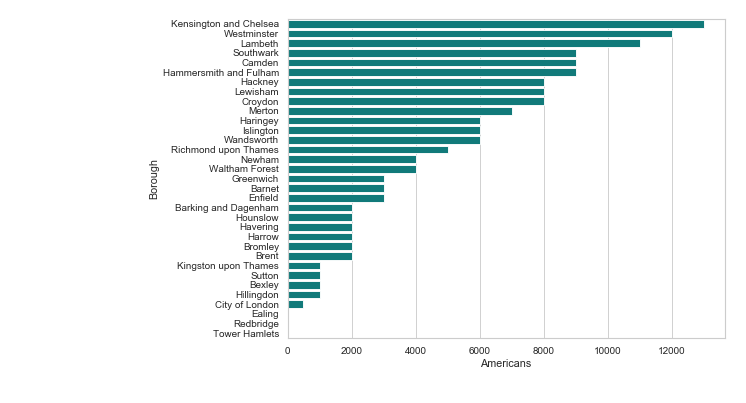

In [317]:
sns.set(style="whitegrid")
ax = sns.barplot(x="Americans", y="Borough", data=df_origin, color = "darkcyan")
plt.tight_layout()
plt.show()

#### Borough vs Rest of World

<IPython.core.display.Javascript object>


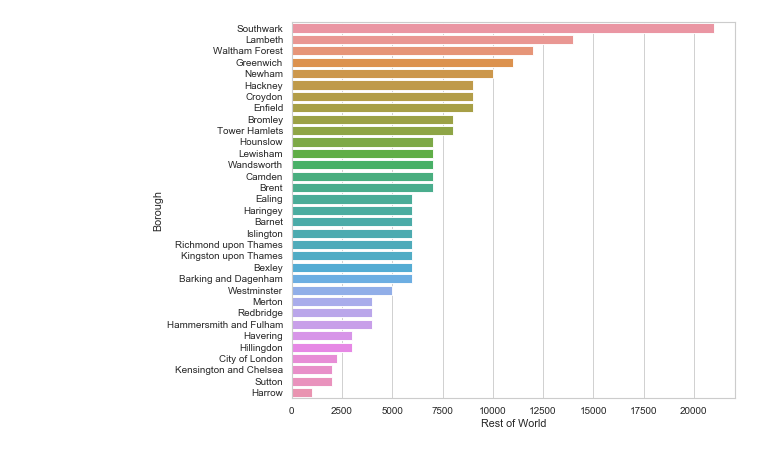

In [320]:
sns.set(style="whitegrid")
ax = sns.barplot(x="Rest of World", y="Borough", data=df_origin,)
plt.tight_layout()
plt.show()

### Top 5 Boroughs based on Ethnicity

#### Based on Total Population

In [350]:
df_ethnic.sort_values(by = ['Population'], ascending = False, inplace = True)
df_ethnic.reset_index(drop = True, inplace = True)
df_ethnic.head()

,Borough,Population,White,Asian,Black,Mixed/ Other
0,Barnet,415066.0949,250000,57000,30000,54000
1,Croydon,401285.4022,227000,70000,64000,24000
2,Newham,371208.3163,111000,166000,47000,27000
3,Ealing,368654.6114,174000,96000,23000,50000
4,Brent,348633.2475,102000,107000,62000,56000


#### Based on White Population

In [351]:
df_ethnic.sort_values(by = ['White'], ascending = False, inplace = True)
df_ethnic.reset_index(drop = True, inplace = True)
df_ethnic.head()

,Borough,Population,White,Asian,Black,Mixed/ Other
0,Bromley,328780.5631,267000,15000,21000,28000
1,Barnet,415066.0949,250000,57000,30000,54000
2,Wandsworth,348150.6880,242000,19000,39000,23000
3,Croydon,401285.4022,227000,70000,64000,24000
4,Havering,266313.1755,216000,13000,14000,15000


#### Based on Asian Population

In [353]:
df_ethnic.sort_values(by = ['Asian'], ascending = False, inplace = True)
df_ethnic.reset_index(drop = True, inplace = True)
df_ethnic.head()

,Borough,Population,White,Asian,Black,Mixed/ Other
0,Newham,371208.3163,111000,166000,47000,27000
1,Tower Hamlets,332237.9683,145000,128000,22000,19000
2,Redbridge,311743.7760,143000,126000,20000,18000
3,Brent,348633.2475,102000,107000,62000,56000
4,Hillingdon,298959.9239,154000,100000,24000,28000


#### Based on Mixed/Other Population

In [354]:
df_ethnic.sort_values(by = ['Mixed/ Other'], ascending = False, inplace = True)
df_ethnic.reset_index(drop = True, inplace = True)
df_ethnic.head()

,Borough,Population,White,Asian,Black,Mixed/ Other
0,Brent,348633.2475,102000,107000,62000,56000
1,Barnet,415066.0949,250000,57000,30000,54000
2,Westminster,243577.4917,140000,33000,17000,51000
3,Ealing,368654.6114,174000,96000,23000,50000
4,Lambeth,338539.7181,172000,28000,76000,49000


### Top 5 Boroughs based on Nationality

#### Based on British Citizen

In [355]:
df_origin.sort_values(by = ['British'], ascending = False, inplace = True)
df_origin.reset_index(drop = True, inplace = True)
df_origin.head()

,Borough,British,Europeans,Asians,Americans,Rest of World
0,Barnet,321000,45000,17000,3000,6000
1,Croydon,320000,33000,15000,8000,9000
2,Bromley,291000,21000,8000,2000,8000
3,Enfield,272000,38000,8000,3000,9000
4,Ealing,271000,41000,21000,0,6000


#### Based on European Citizens

In [358]:
df_origin.sort_values(by = ['Europeans'], ascending = False, inplace = True)
df_origin.reset_index(drop = True, inplace = True)
df_origin.head()

,Borough,British,Europeans,Asians,Americans,Rest of World
0,Brent,226000,66000,27000,2000,7000
1,Redbridge,222000,54000,23000,0,4000
2,Haringey,199000,54000,7000,6000,6000
3,Tower Hamlets,222000,53000,28000,0,8000
4,Newham,257000,53000,27000,4000,10000


#### Based on American Citizens

In [359]:
df_origin.sort_values(by = ['Americans'], ascending = False, inplace = True)
df_origin.reset_index(drop = True, inplace = True)
df_origin.head()

,Borough,British,Europeans,Asians,Americans,Rest of World
0,Kensington and Chelsea,100000,27000,10000,13000,2000
1,Westminster,171000,42,18000,12000,5000
2,Lambeth,253000,40000,6000,11000,14000
3,Hammersmith and Fulham,131000,28000,7000,9000,4000
4,Southwark,230000,47000,9000,9000,21000


#### Based on Rest of the World Citizens

In [357]:
df_origin.sort_values(by = ['Rest of World'], ascending = False, inplace = True)
df_origin.reset_index(drop = True, inplace = True)
df_origin.head()

,Borough,British,Europeans,Asians,Americans,Rest of World
0,Southwark,230000,47000,9000,9000,21000
1,Lambeth,253000,40000,6000,11000,14000
2,Waltham Forest,225000,27000,5000,4000,12000
3,Greenwich,221000,32000,11000,3000,11000
4,Newham,257000,53000,27000,4000,10000


### Based on the EDA performed on the data, We can conclude that two boroughs: Barnet and Newham, are best suited to open the restaurant.

## Total Population of Barnet and Newham

In [443]:
df = df_london.iloc[1:2]
df1 = df_london.iloc[24:25]
df=df.append(df1, ignore_index = True)
df.set_index('Borough', inplace = True)
df = df.T
df

,Barnet,Newham
Borough,,
Population,415066.0949,371208.3163
White,250000.0000,111000.0000
Asian,57000.0000,166000.0000
Black,30000.0000,47000.0000
Mixed/ Other,54000.0000,27000.0000
British,321000.0000,257000.0000
Europeans,45000.0000,53000.0000
Americans,3000.0000,4000.0000
Rest of World,6000.0000,10000.0000


### Barnet vs Newham - Line Graph

<IPython.core.display.Javascript object>


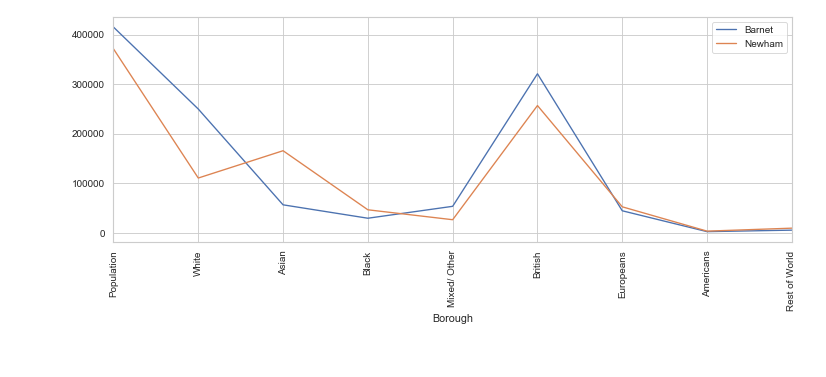

In [444]:
df.plot(kind = 'line')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

### Based on the line graph and EDA of Barnet vs Newham, We can conclude that Barnet is the best borough to open the restaurant.

## Scrap data from Wikipedia for all Neighborhoods in Barnet borough

In [468]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import re
URL = "https://en.wikipedia.org/wiki/List_of_areas_of_London"
res = requests.get(URL).text
soup = BeautifulSoup(res,'lxml')

codes = []
areas_list = []
href_links_list = []
for items in soup.find('table', class_= 'wikitable sortable').find_all('tr')[1::]:
    data = items.find_all(['td'])
    data0 = data[0]
    area_name = data0.text

    data1 = data[1]
    data1 = data1.text
    borough = data1.split('[')
    borough_name = borough[0]
    data5 = data[5]
    code = data5.text
    code = code.strip()
    
    if borough_name == 'Barnet':
        codes.append(code)
        areas_list.append((borough_name,area_name,code))

                
for link in soup.findAll('a', attrs={'href': re.compile("^https://tools.wmflabs.org")}):
            htext = link.text
            if htext in codes:
                hlink = link.get('href')
                href_links_list.append((htext, hlink))

#### Create a DataFrame with the scrapped data

In [481]:
df_areas = pd.DataFrame(areas_list, columns=['Borough', 'Neighborhood', 'Code'])
df_areas.head()

,Borough,Neighborhood,Code
0,Barnet,Arkley,TQ225955
1,Barnet,Barnet Gate,TQ218952
2,Barnet,"Barnet (also Chipping Barnet, High Barnet)",TQ245955
3,Barnet,Brent Cross,TQ230874
4,Barnet,Brunswick Park,TQ280932


#### Create a DataFrame from the list of href links    

In [482]:
df_links = pd.DataFrame(href_links_list, columns=['Code','href'])
df_links.head()

,Code,href
0,TQ225955,https://tools.wmflabs.org/geohack/en/51.644964...
1,TQ295925,https://tools.wmflabs.org/geohack/en/51.616437...
2,TQ218952,https://tools.wmflabs.org/geohack/en/51.642419...
3,TQ245955,https://tools.wmflabs.org/geohack/en/51.644525...
4,TQ230874,https://tools.wmflabs.org/geohack/en/51.572060...


#### Merge Areas and href links

In [483]:
cols = df_links.columns.difference(df_areas.columns)
df_areas_links = pd.concat([df_areas, df_links[cols]], axis=1)
df_areas_links = df_areas_links.dropna(how='any')
df_areas_links.head()

,Borough,Neighborhood,Code,href
0,Barnet,Arkley,TQ225955,https://tools.wmflabs.org/geohack/en/51.644964...
1,Barnet,Barnet Gate,TQ218952,https://tools.wmflabs.org/geohack/en/51.616437...
2,Barnet,"Barnet (also Chipping Barnet, High Barnet)",TQ245955,https://tools.wmflabs.org/geohack/en/51.642419...
3,Barnet,Brent Cross,TQ230874,https://tools.wmflabs.org/geohack/en/51.644525...
4,Barnet,Brunswick Park,TQ280932,https://tools.wmflabs.org/geohack/en/51.572060...


#### Get the Geo co-ordinates for all the areas in the Newham borough

In [476]:
geo_codes = []
for row in df_areas_links.itertuples():
    url = row.href
    code = row.Code
    res = requests.get(url).text
    soup1 = BeautifulSoup(res,'lxml')
    
    for lat in soup1.find('span',{'class':'latitude'}):
        latitude = lat
        latitude = float(latitude)
            
    for long in soup1.find('span',{'class':'longitude'}):    
        longitude = long
        longitude = float(longitude)
        
    geo_codes.append((code, latitude, longitude))

print(geo_codes)

[('TQ225955', 51.644964, -0.230957), ('TQ218952', 51.616438, -0.130954), ('TQ245955', 51.64242, -0.241173), ('TQ230874', 51.644525, -0.202067), ('TQ280932', 51.572061, -0.226573), ('TQ205915', 51.623071, -0.152352), ('TQ227891', 51.609447, -0.261223), ('TQ245865', 51.587404, -0.230307), ('TQ255905', 51.563643, -0.205259), ('TQ213897', 51.599369, -0.189412), ('TQ278918', 51.593099, -0.250297), ('TQ275945', 51.610535, -0.155749), ('TQ265895', 51.634867, -0.159097), ('TQ195925', 51.590159, -0.175342), ('TQ255905', 51.618647, -0.275316), ('TQ276920', 51.599369, -0.189412), ('TQ248876', 51.612378, -0.158563), ('TQ217905', 51.573463, -0.200543), ('TQ205918', 51.600202, -0.244248), ('TQ265885', 51.612144, -0.26112), ('TQ229887', 51.581172, -0.175702), ('TQ215888', 51.583766, -0.227561), ('TQ225925', 51.584967, -0.247723), ('TQ245975', 51.618003, -0.232006), ('TQ265955', 51.662499, -0.201356), ('TQ295925', 51.644079, -0.173178), ('TQ265925', 51.616438, -0.130954), ('TQ265935', 51.617119, -0.17

#### Create a DataFrame for each code along with their Latitude and Longitude

In [477]:
df_geo_codes = pd.DataFrame(geo_codes, columns=['Code','Latitude','Longitude'])
df_geo_codes.head()

,Code,Latitude,Longitude
0,TQ225955,51.644964,-0.230957
1,TQ218952,51.616438,-0.130954
2,TQ245955,51.642420,-0.241173
3,TQ230874,51.644525,-0.202067
4,TQ280932,51.572061,-0.226573


#### Merge the Neighborhoods and Geocodes DataFrames

In [501]:
cols = df_geo_codes.columns.difference(df_areas.columns)
Barnet_borough = pd.concat([df_areas, df_geo_codes[cols]], axis=1)
Barnet_borough.drop(['Code'], axis=1, inplace=True)
Barnet_borough.head()

,Borough,Neighborhood,Latitude,Longitude
0,Barnet,Arkley,51.644964,-0.230957
1,Barnet,Barnet Gate,51.616438,-0.130954
2,Barnet,"Barnet (also Chipping Barnet, High Barnet)",51.642420,-0.241173
3,Barnet,Brent Cross,51.644525,-0.202067
4,Barnet,Brunswick Park,51.572061,-0.226573


## Segmentation and Clustering of Barnet Borough

#### Get the Coordinates of Barnet Borough

In [552]:
address = 'Barnet, London'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Barnet are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Barnet are 51.65309, -0.2002261.


#### Create a map to show all Neighborhoods in Barnet Borough

In [513]:
# create map of Newham using latitude and longitude values
map_Barnet = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(Barnet_borough['Latitude'], Barnet_borough['Longitude'], Barnet_borough['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_Barnet)  
    
map_Newham

## Getting the top 100 places of Barnet Neighborhood

#### Create GET request URL

In [522]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
CLIENT_ID = "ERSEN0XBPCXE5RCY412GK5NUGZ3S2JHK43I3VTB3E2KXKRXQ"
CLIENT_SECRET = "TFST2H3SE1DJGW3BNWPFHKRLETSHUFDQEXXKCNJEDUK43M3K"
VERSION = "20182602"
latitudes = "51.65309"
longitudes = "-0.2002261"

#### Create a DataFrame for the venues and their co-ordinates in Barnet Neighborhood

In [523]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [524]:
nearby_venues = getNearbyVenues(names=Barnet_borough['Neighborhood'],
                                   latitudes=Barnet_borough['Latitude'],
                                   longitudes=Barnet_borough['Longitude']
                                  )

Arkley
Barnet Gate
Barnet (also Chipping Barnet, High Barnet)
Brent Cross
Brunswick Park
Burnt Oak
Burroughs, The
Childs Hill
Church End
Colindale
Colney Hatch
East Barnet
East Finchley
Edgware
Finchley
Friern Barnet
Golders Green
Grahame Park
The Hale
Hampstead Garden Suburb
Hendon
The Hyde
Mill Hill
Monken Hadley
New Barnet
New Southgate
North Finchley
Oakleigh Park
Osidge
Temple Fortune
Totteridge
West Hendon
Whetstone
Woodside Park


In [565]:
nearby_venues.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Arkley,51.644964,-0.230957,Cottage Garden Nursery,51.645982,-0.234079,Flower Shop
1,Arkley,51.644964,-0.230957,Arkley Golf Club,51.647774,-0.233413,Golf Course
2,Barnet Gate,51.616438,-0.130954,The Arnos Arms,51.616044,-0.132136,Beer Bar
3,Barnet Gate,51.616438,-0.130954,Arnos Park,51.618336,-0.130720,Park
4,Barnet Gate,51.616438,-0.130954,Sainsbury's Local,51.616347,-0.135881,Grocery Store


#### Group each Neighborhood and count the venue category

In [526]:
nearby_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Arkley,2,2,2,2,2,2
"Barnet (also Chipping Barnet, High Barnet)",3,3,3,3,3,3
Barnet Gate,5,5,5,5,5,5
Brent Cross,2,2,2,2,2,2
Brunswick Park,20,20,20,20,20,20
Burnt Oak,4,4,4,4,4,4
"Burroughs, The",4,4,4,4,4,4
Childs Hill,14,14,14,14,14,14
Church End,4,4,4,4,4,4


#### One hot encoding of Venue Categories

In [527]:
# one hot encoding
barnet_onehotencod = pd.get_dummies(nearby_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
barnet_onehotencod['Neighbourhood'] = nearby_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [barnet_onehotencod.columns[-1]] + list(barnet_onehotencod.columns[:-1])
barnet_onehotencod.head()

,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Beer Bar,Beer Store,Bookstore,Brazilian Restaurant,...,Tennis Court,Thai Restaurant,Theater,Toy / Game Store,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Neighbourhood
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Arkley
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Arkley
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Barnet Gate
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Barnet Gate
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Barnet Gate


In [566]:
barnet_grouped = barnet_onehotencod.groupby('Neighbourhood').mean().reset_index()
barnet_grouped.head()

,Neighbourhood,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Beer Bar,Beer Store,Bookstore,...,Tea Room,Tennis Court,Thai Restaurant,Theater,Toy / Game Store,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store
0,Arkley,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00
1,"Barnet (also Chipping Barnet, High Barnet)",0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00
2,Barnet Gate,0.00,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00
3,Brent Cross,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00
4,Brunswick Park,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.05


#### Determine 10 most common venues in each Neighboorhood

In [529]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [530]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['Neighbourhood'] = barnet_grouped['Neighbourhood']

for ind in np.arange(barnet_grouped.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(barnet_grouped.iloc[ind, :], num_top_venues)

venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arkley,Flower Shop,Golf Course,Warehouse Store,Gastropub,Falafel Restaurant,Farm,Fast Food Restaurant,Fish & Chips Shop,Forest,Fried Chicken Joint
1,"Barnet (also Chipping Barnet, High Barnet)",Pub,Forest,Soccer Field,Gas Station,Electronics Store,Falafel Restaurant,Farm,Fast Food Restaurant,Fish & Chips Shop,Flower Shop
2,Barnet Gate,Pool,Beer Bar,Grocery Store,Park,Chinese Restaurant,Warehouse Store,Gas Station,Farm,Fast Food Restaurant,Fish & Chips Shop
3,Brent Cross,Construction & Landscaping,Grocery Store,Warehouse Store,Gastropub,Falafel Restaurant,Farm,Fast Food Restaurant,Fish & Chips Shop,Flower Shop,Forest
4,Brunswick Park,Café,Clothing Store,Coffee Shop,Electronics Store,Furniture / Home Store,Warehouse Store,Stationery Store,Department Store,Shoe Store,Shopping Plaza


## Clustering of Neighborhoods

In [536]:
# set number of clusters
kclusters = 5

barnet_grouped_clustering = barnet_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(barnet_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_ 
# to change use .astype()

array([0, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 4, 3, 1, 1])

In [548]:
barnet_merged = Barnet_borough
# add clustering labels
barnet_merged['Cluster_Labels'] = kmeans.labels_
# merge venues_sorted with barnet_merged to add latitude/longitude for each neighborhood
barnet_merged = barnet_merged.join(venues_sorted.set_index('Neighbourhood'), on='Neighborhood')
barnet_merged=barnet_merged.dropna()
barnet_merged.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barnet,Arkley,51.644964,-0.230957,0,0,Flower Shop,Golf Course,Warehouse Store,Gastropub,Falafel Restaurant,Farm,Fast Food Restaurant,Fish & Chips Shop,Forest,Fried Chicken Joint
1,Barnet,Barnet Gate,51.616438,-0.130954,1,1,Pool,Beer Bar,Grocery Store,Park,Chinese Restaurant,Warehouse Store,Gas Station,Farm,Fast Food Restaurant,Fish & Chips Shop
2,Barnet,"Barnet (also Chipping Barnet, High Barnet)",51.642420,-0.241173,1,1,Pub,Forest,Soccer Field,Gas Station,Electronics Store,Falafel Restaurant,Farm,Fast Food Restaurant,Fish & Chips Shop,Flower Shop
3,Barnet,Brent Cross,51.644525,-0.202067,4,4,Construction & Landscaping,Grocery Store,Warehouse Store,Gastropub,Falafel Restaurant,Farm,Fast Food Restaurant,Fish & Chips Shop,Flower Shop,Forest
4,Barnet,Brunswick Park,51.572061,-0.226573,1,1,Café,Clothing Store,Coffee Shop,Electronics Store,Furniture / Home Store,Warehouse Store,Stationery Store,Department Store,Shoe Store,Shopping Plaza


In [549]:
barnet_merged['Cluster Labels'] = barnet_merged.Cluster_Labels.astype(int)

#### Create a map to show all clusters in the neighborhoods

In [558]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(barnet_merged['Latitude'], barnet_merged['Longitude'], barnet_merged['Neighborhood'], barnet_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Analyzing each Cluster

#### Cluster 1

In [559]:
barnet_merged.loc[barnet_merged['Cluster Labels'] == 0, barnet_merged.columns[[1] + list(range(5, barnet_merged.shape[1]))]]

,Neighborhood,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arkley,0,Flower Shop,Golf Course,Warehouse Store,Gastropub,Falafel Restaurant,Farm,Fast Food Restaurant,Fish & Chips Shop,Forest,Fried Chicken Joint


#### Cluster 2

In [560]:
barnet_merged.loc[barnet_merged['Cluster Labels'] == 1, barnet_merged.columns[[1] + list(range(5, barnet_merged.shape[1]))]]

,Neighborhood,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Barnet Gate,1,Pool,Beer Bar,Grocery Store,Park,Chinese Restaurant,Warehouse Store,Gas Station,Farm,Fast Food Restaurant,Fish & Chips Shop
2,"Barnet (also Chipping Barnet, High Barnet)",1,Pub,Forest,Soccer Field,Gas Station,Electronics Store,Falafel Restaurant,Farm,Fast Food Restaurant,Fish & Chips Shop,Flower Shop
4,Brunswick Park,1,Café,Clothing Store,Coffee Shop,Electronics Store,Furniture / Home Store,Warehouse Store,Stationery Store,Department Store,Shoe Store,Shopping Plaza
5,Burnt Oak,1,Café,Bus Stop,Recording Studio,Warehouse Store,Falafel Restaurant,Farm,Fast Food Restaurant,Fish & Chips Shop,Flower Shop,Forest
6,"Burroughs, The",1,Indian Restaurant,Bakery,Fried Chicken Joint,Park,Gastropub,Falafel Restaurant,Farm,Fast Food Restaurant,Fish & Chips Shop,Flower Shop
7,Childs Hill,1,Coffee Shop,Bus Stop,Pub,Korean Restaurant,Student Center,Sushi Restaurant,Fried Chicken Joint,Grocery Store,Japanese Restaurant,Gym / Fitness Center
8,Church End,1,Bus Stop,Hotel,Sushi Restaurant,Park,Warehouse Store,Falafel Restaurant,Farm,Fast Food Restaurant,Fish & Chips Shop,Flower Shop
9,Colindale,1,Turkish Restaurant,Pub,Coffee Shop,Restaurant,Café,Pizza Place,Bus Stop,Park,Hookah Bar,Cosmetics Shop
10,Colney Hatch,1,Gym / Fitness Center,Convenience Store,Pub,Park,Fast Food Restaurant,Grocery Store,Pizza Place,Coffee Shop,Falafel Restaurant,Farm
11,East Barnet,1,Grocery Store,Indoor Play Area,Residential Building (Apartment / Condo),Playground,Fish & Chips Shop,Coffee Shop,Supermarket,Dessert Shop,Italian Restaurant,Gym


#### Cluster 3

In [561]:
barnet_merged.loc[barnet_merged['Cluster Labels'] == 2, barnet_merged.columns[[1] + list(range(5, barnet_merged.shape[1]))]]

,Neighborhood,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,Monken Hadley,2,Pub,Athletics & Sports,Farm,Café,Gastropub,Falafel Restaurant,Fast Food Restaurant,Fish & Chips Shop,Flower Shop,Forest


#### Cluster 4

In [562]:
barnet_merged.loc[barnet_merged['Cluster Labels'] == 3, barnet_merged.columns[[1] + list(range(5, barnet_merged.shape[1]))]]

,Neighborhood,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
31,West Hendon,3,Bus Stop,Church,Warehouse Store,Farm,Fast Food Restaurant,Fish & Chips Shop,Flower Shop,Forest,Fried Chicken Joint,Furniture / Home Store


#### Cluster 5

In [563]:
barnet_merged.loc[barnet_merged['Cluster Labels'] == 4, barnet_merged.columns[[1] + list(range(5, barnet_merged.shape[1]))]]

,Neighborhood,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Brent Cross,4,Construction & Landscaping,Grocery Store,Warehouse Store,Gastropub,Falafel Restaurant,Farm,Fast Food Restaurant,Fish & Chips Shop,Flower Shop,Forest
30,Totteridge,4,Construction & Landscaping,Grocery Store,Warehouse Store,Gastropub,Falafel Restaurant,Farm,Fast Food Restaurant,Fish & Chips Shop,Flower Shop,Forest


# Conclusion: Based on the analysis performed on the various Boroughs and Neighborhoods in London, We can conclude that Mill Hill, Hampstead Garden Suburb, Friern Barnet, Finchley, Colindale and The Burroughs are the best Neighborhoods in Barnet Borough to open the restaurant.